In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from difflib import SequenceMatcher
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# train_full dataset

In [7]:
#load data
data1=pd.read_csv("train_full.csv")
data1.head()

/var/folders/wq/b6jrf0m53410r55lzfgswyvr0000gn/T/ipykernel_16380/1503859556.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv("train_full.csv")


,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802400 entries, 0 to 5802399
Data columns (total 73 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   customer_id             object 
 1   gender                  object 
 2   status_x                int64  
 3   verified_x              int64  
 4   created_at_x            object 
 5   updated_at_x            object 
 6   location_number         int64  
 7   location_type           object 
 8   latitude_x              float64
 9   longitude_x             float64
 10  id                      int64  
 11  authentication_id       float64
 12  latitude_y              float64
 13  longitude_y             float64
 14  vendor_category_en      object 
 15  vendor_category_id      float64
 16  delivery_charge         float64
 17  serving_distance        float64
 18  is_open                 float64
 19  OpeningTime             object 
 20  OpeningTime2            object 
 21  prepration_time         int64  

In [11]:
# The dataset has 73 columns and 5802400 rows :

# So we will just look over about 8-10 columns

# gender : Customer's sex
# location type : Customer orders from one or more locations
# language : Chose language
# Opening Time : Vendr's operating time
# city_id : City's id
# vendor_rating : The vendor's average rating score

<AxesSubplot: >

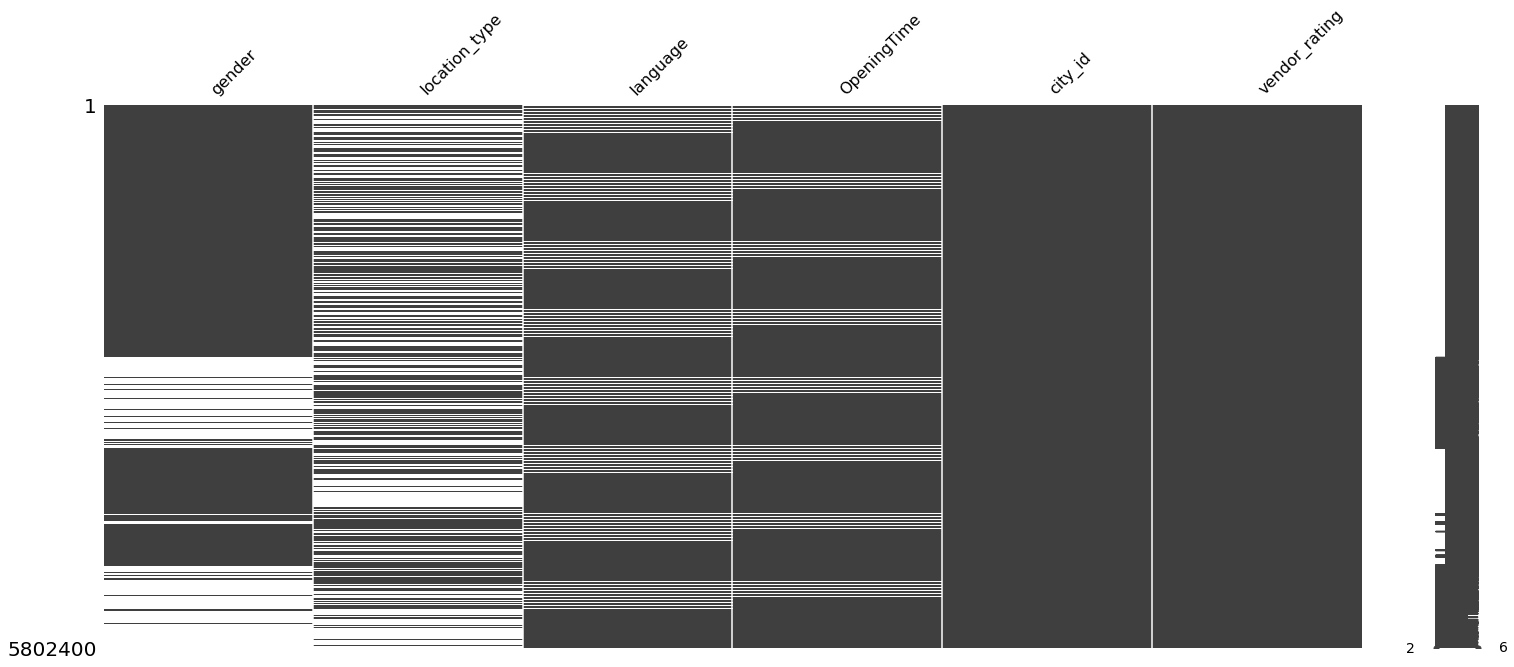

In [12]:
# Visualize missing values as a matrix
main_df=data1[['gender','location_type','language','OpeningTime','city_id','vendor_rating']]
msno.matrix(main_df)

In [13]:
#Gender

print(data1['gender'].value_counts()) 
gender_null = np.count_nonzero(data1['gender'].isnull())
print(gender_null)

gender_null/data1.shape[0]
# variables : Male / Female 
# null ratio is about 30%

Male      3789100
Female     308200
Name: gender, dtype: int64
1705100


0.2938611608989384

<AxesSubplot: xlabel='gender', ylabel='count'>

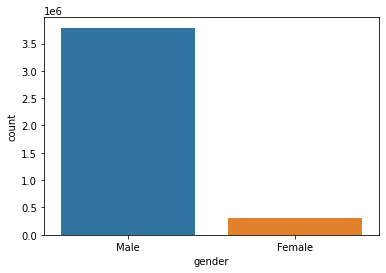

In [31]:
sns.countplot(x='gender',data=data1)

In [32]:
#location type
print(data1['location_type'].value_counts())
location_null = np.count_nonzero(data1['location_type'].isnull())
print(location_null)

print("null Ratio : ", location_null/data1.shape[0]) 
# variables : Home / Work / Other  but, we don't know the meaning of 'other' 
# null ratio is about 45%

Home     1921700
Work      627400
Other     599100
Name: location_type, dtype: int64
2654200
null Ratio :  0.45743140769336826


<AxesSubplot: xlabel='location_type', ylabel='count'>

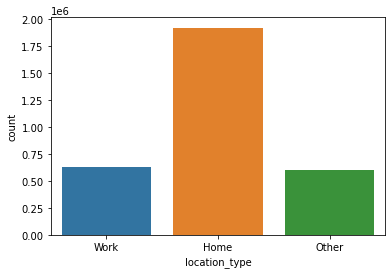

In [34]:
sns.countplot(x='location_type',data=data1)

<AxesSubplot: xlabel='gender', ylabel='count'>

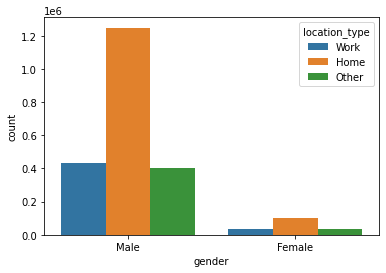

In [39]:
# The difference of location type by gender
sns.countplot(data=data1,x='gender',hue='location_type')

In [40]:
#Language
print(data1['language'].value_counts())
null = np.count_nonzero(data1['language'].isnull())
print(null)

null/data1.shape[0] 
# variables : it has only EN(english)
# null ratio is about 15%

EN    4932040
Name: language, dtype: int64
870360


0.15

In [41]:
#Opening Time
null = np.count_nonzero(data1['OpeningTime'].isnull())
print(null)

null/data1.shape[0]
# null ratio is about 9%

522216


0.09

In [42]:
#Vendor's average rating score

print(data1['vendor_rating'].value_counts())
null = np.count_nonzero(data1['vendor_rating'].isnull())
print(null)

null/data1.shape[0]
# it has no NaN

4.5    1102456
4.3    1044432
4.2     870360
4.4     812336
4.6     580240
4.7     406168
4.0     348144
4.1     290120
3.8     116048
4.8     116048
3.2      58024
3.7      58024
Name: vendor_rating, dtype: int64
0


0.0

<AxesSubplot: xlabel='vendor_rating', ylabel='count'>

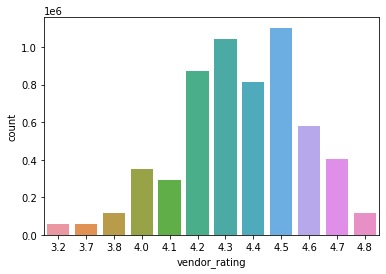

In [43]:
sns.countplot(x='vendor_rating',data=data1)

In [44]:
# Vendor_rating's distribution is quite crowded between 4.2 and 4.5 👆🏼

In [46]:
# Now Orders dataset :👇🏼

In [47]:
data2 = pd.read_csv("orders.csv")
data2.head()

/var/folders/wq/b6jrf0m53410r55lzfgswyvr0000gn/T/ipykernel_16380/658036531.py:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("orders.csv")


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

In [49]:
# The dataset has 26 columns and 135303 rows :

# Just simply explain some columns

# akeed_order_id : Unique customer ID, used in train_locations and train_orders
# vendor_rating : The ratings are rated by customers who use the vendor
# vendor_id : vendor's unique id
# customer_id : customer's unique id

In [50]:
#vendor_rating

print(data2['vendor_rating'].value_counts())
null = np.count_nonzero(data2['vendor_rating'].isnull())
print(null)

null/data2.shape[0] 
# null ratio is about 66%

0.0    25175
5.0    14212
4.0     2748
3.0     1426
1.0     1029
2.0      630
Name: vendor_rating, dtype: int64
90083


0.6657871591908531

<AxesSubplot: xlabel='vendor_rating', ylabel='count'>

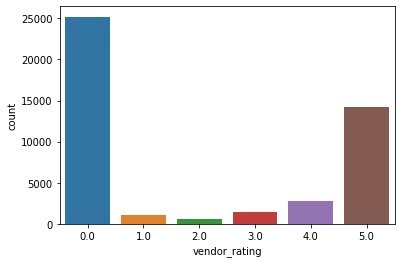

In [51]:
sns.countplot(x='vendor_rating',data=data2)

In [52]:
# The ratings except 0 score are almost 5 score

In [53]:
#vendor_id
print(data2['vendor_id'].value_counts())
#the unique vendor count is 100

113    7807
105    5562
79     5117
84     5001
78     4643
       ... 
304     562
271     559
196     512
250     503
295     474
Name: vendor_id, Length: 100, dtype: int64


In [54]:
#customer_id
print(data2['customer_id'].value_counts())
#the customer number is 27445

XW90EAP    262
TL7Z2DM    151
VDEJEMP    146
HJFTTGW    128
B28LJKM    119
          ... 
B6DEG8Q      1
FP47TR0      1
NIIOLY3      1
1WM7MLN      1
QDXLWM7      1
Name: customer_id, Length: 27445, dtype: int64


In [ ]:
# This completes our EDA for our Restaurant Dataset.